In [1]:
# Install libraries (Colab needs this)
!pip install requests beautifulsoup4 pandas


In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Website URL
url = "https://books.toscrape.com/"

# Request page
response = requests.get(url)
soup = BeautifulSoup(response.text, "html.parser")

# Get all books
books = soup.find_all("article", class_="product_pod")

titles = []
prices = []
ratings = []

for book in books:
    titles.append(book.h3.a["title"])
    prices.append(book.find("p", class_="price_color").text)
    ratings.append(book.p["class"][1])

# Create dataframe
df = pd.DataFrame({
    "Title": titles,
    "Price": prices,
    "Rating": ratings
})

# Save CSV file
df.to_csv("books_data.csv", index=False)

print("✅ Dataset Created")
df.head()


✅ Dataset Created


,Title,Price,Rating
0,A Light in the Attic,Â£51.77,Three
1,Tipping the Velvet,Â£53.74,One
2,Soumission,Â£50.10,One
3,Sharp Objects,Â£47.82,Four
4,Sapiens: A Brief History of Humankind,Â£54.23,Five


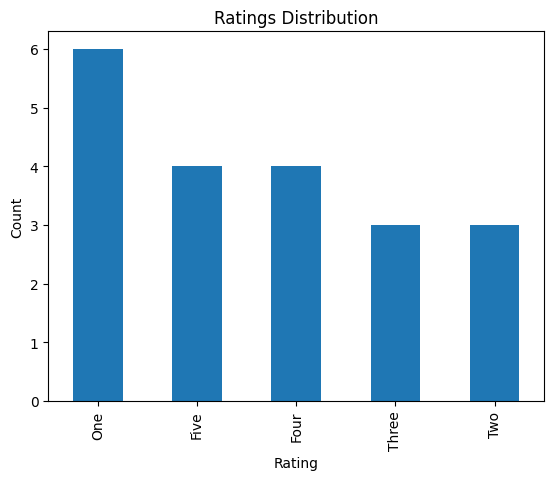

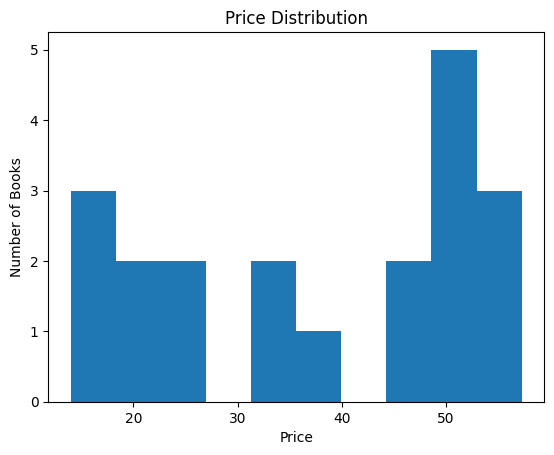

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("books_data.csv")

# Clean price column (remove Â and £)
df["Price"] = df["Price"].str.replace("Â", "", regex=False)
df["Price"] = df["Price"].str.replace("£", "", regex=False)

# Convert to float
df["Price"] = df["Price"].astype(float)

# ---------- Graph 1 ----------
plt.figure()

df["Rating"].value_counts().plot(kind="bar")

plt.title("Ratings Distribution")
plt.xlabel("Rating")
plt.ylabel("Count")

plt.show()


# ---------- Graph 2 ----------
plt.figure()

plt.hist(df["Price"])

plt.title("Price Distribution")
plt.xlabel("Price")
plt.ylabel("Number of Books")

plt.show()
